In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
file_path = "crime through social media.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Basic information
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False))

print("\n--- Statistical Summary ---")
print(df.describe())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_ID                        5000 non-null   int64  
 1   Age_Group                      5000 non-null   object 
 2   Gender                         5000 non-null   object 
 3   Location                       5000 non-null   object 
 4   Device_Type                    5000 non-null   object 
 5   Social_Media_Platform          5000 non-null   object 
 6   Two_Factor_Authentication      5000 non-null   object 
 7   Saved_Password                 5000 non-null   object 
 8   Account_Privacy                5000 non-null   object 
 9   Frequent_New_Device_Logging    5000 non-null   object 
 10  Connection_Type                5000 non-null   object 
 11  Time_of_Day                    5000 non-null   object 
 12  Payment_Mode              

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_17444\3417829316.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Click_Leads_To_Malicious_Site", palette="coolwarm")


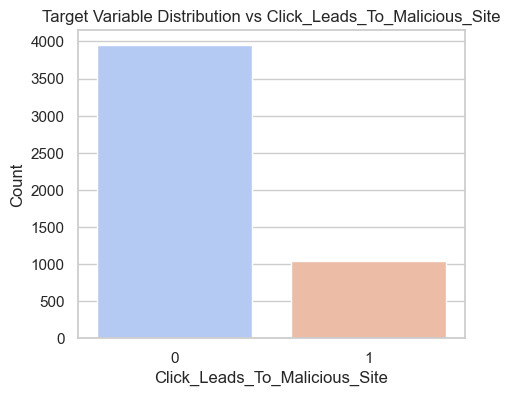

In [17]:
# sns.set(style="whitegrid", palette="pastel", color_codes=True)

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Click_Leads_To_Malicious_Site", palette="coolwarm")
plt.title("Target Variable Distribution vs Click_Leads_To_Malicious_Site")
# plt.xlabel("0 = Safe | 1 = Malicious")
plt.ylabel("Count")
plt.show()

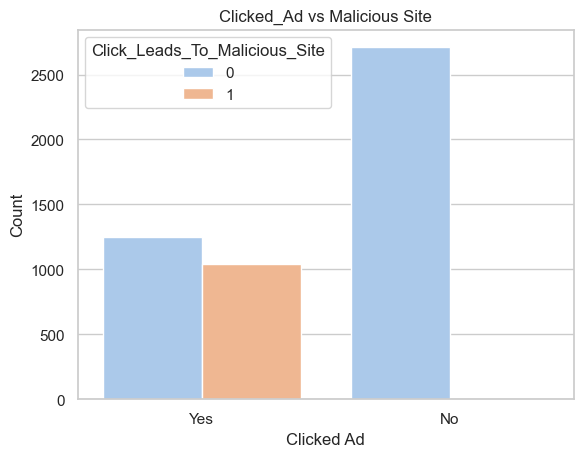

In [21]:
sns.countplot(data=df, x="Clicked_Ad", hue="Click_Leads_To_Malicious_Site")
plt.title("Clicked_Ad vs Malicious Site")
plt.xlabel("Clicked Ad")
plt.ylabel("Count")
plt.show()

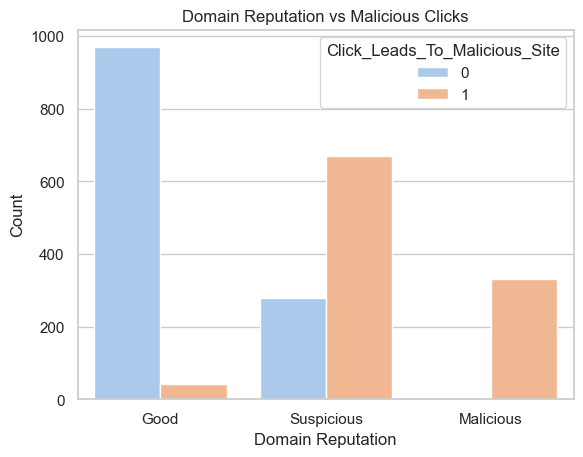

In [22]:
sns.countplot(data=df, x="Domain_Reputation", hue="Click_Leads_To_Malicious_Site")
plt.title("Domain Reputation vs Malicious Clicks")
plt.xlabel("Domain Reputation")
plt.ylabel("Count")
plt.show()

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_17444\3618678389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Two_Factor_Authentication", y="Click_Leads_To_Malicious_Site", palette="viridis")


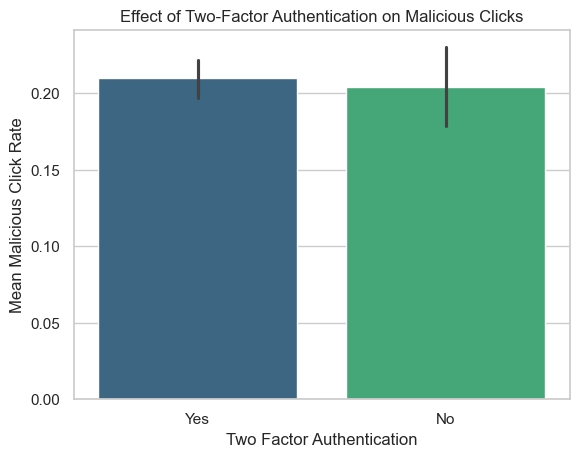

In [26]:
sns.barplot(data=df, x="Two_Factor_Authentication", y="Click_Leads_To_Malicious_Site", palette="viridis")
plt.title("Effect of Two-Factor Authentication on Malicious Clicks")
plt.xlabel("Two Factor Authentication")
plt.ylabel("Mean Malicious Click Rate")
plt.show()

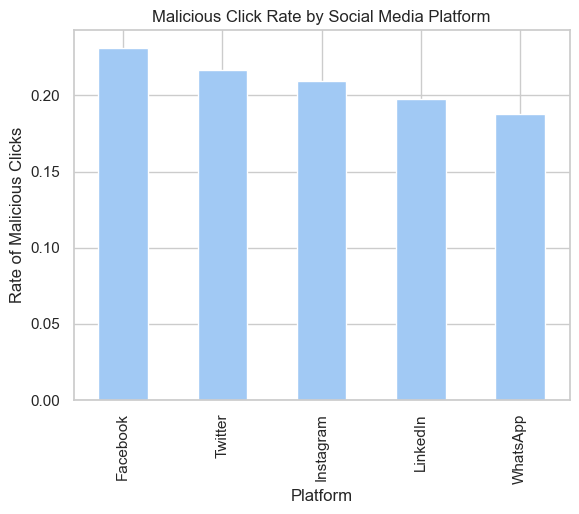

In [28]:
platform_rate = df.groupby("Social_Media_Platform")["Click_Leads_To_Malicious_Site"].mean().sort_values(ascending=False)
platform_rate.plot(kind="bar")
plt.title("Malicious Click Rate by Social Media Platform")
plt.ylabel("Rate of Malicious Clicks")
plt.xlabel("Platform")
plt.show()

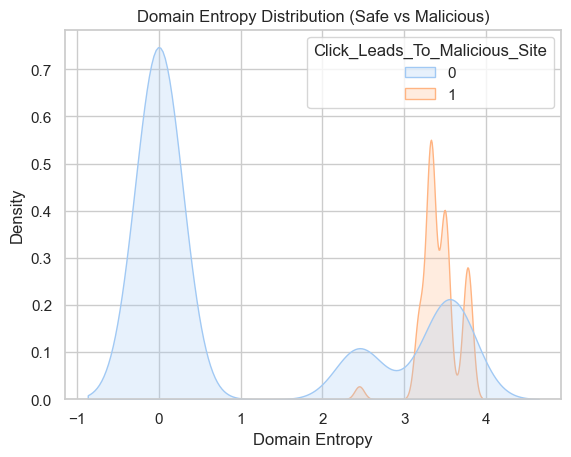

In [30]:
sns.kdeplot(data=df, x="Domain_Entropy", hue="Click_Leads_To_Malicious_Site", fill=True)
plt.title("Domain Entropy Distribution (Safe vs Malicious)")
plt.xlabel("Domain Entropy")
plt.ylabel("Density")
plt.show()

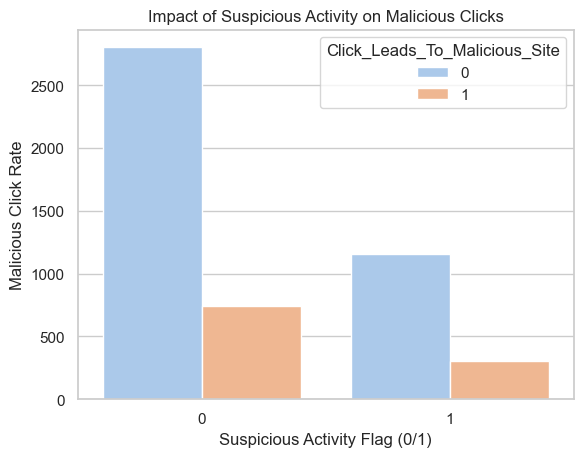

In [31]:
# sns.barplot(data=df, x="Suspicious_Activity", y="Click_Leads_To_Malicious_Site", palette="magma")
sns.countplot(data=df, x="Suspicious_Activity", hue="Click_Leads_To_Malicious_Site")

plt.title("Impact of Suspicious Activity on Malicious Clicks")
plt.xlabel("Suspicious Activity Flag (0/1)")
plt.ylabel("Malicious Click Rate")
plt.show()

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_17444\2745593169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_rate.values, y=area_rate.index, palette="Reds_r")


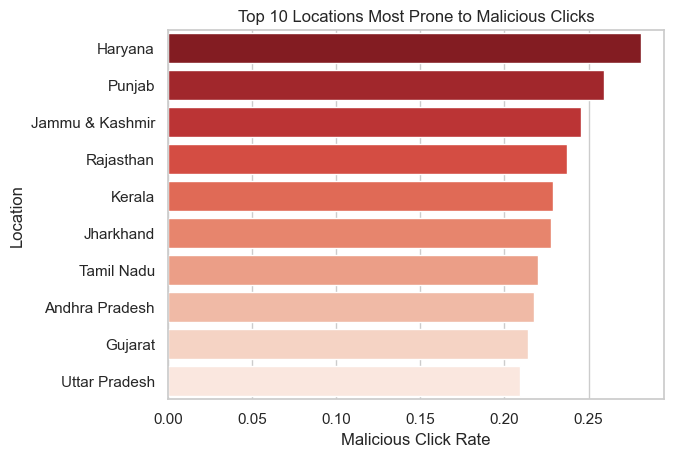


--- Top 10 High-Risk Areas ---
Location
Haryana            0.280899
Punjab             0.259259
Jammu & Kashmir    0.245614
Rajasthan          0.237389
Kerala             0.228571
Jharkhand          0.227723
Tamil Nadu         0.220126
Andhra Pradesh     0.217778
Gujarat            0.214035
Uttar Pradesh      0.209101
Name: Click_Leads_To_Malicious_Site, dtype: float64


In [32]:
area_rate = (    df.groupby("Location")["Click_Leads_To_Malicious_Site"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=area_rate.values, y=area_rate.index, palette="Reds_r")
plt.title("Top 10 Locations Most Prone to Malicious Clicks")
plt.xlabel("Malicious Click Rate")
plt.ylabel("Location")
plt.show()

print("\n--- Top 10 High-Risk Areas ---")
print(area_rate)

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_17444\1144292225.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_rate.index, y=time_rate.values, palette="coolwarm")


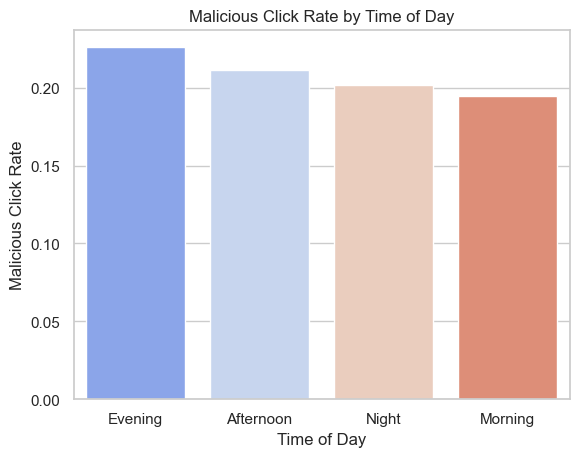


--- Malicious Rate by Time of Day ---
Time_of_Day
Evening      0.225935
Afternoon    0.211464
Night        0.201439
Morning      0.194838
Name: Click_Leads_To_Malicious_Site, dtype: float64


In [34]:
time_rate = (
    df.groupby("Time_of_Day")["Click_Leads_To_Malicious_Site"]
    .mean()
    .sort_values(ascending=False)
)

sns.barplot(x=time_rate.index, y=time_rate.values, palette="coolwarm")
plt.title("Malicious Click Rate by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Malicious Click Rate")
plt.show()

print("\n--- Malicious Rate by Time of Day ---")
print(time_rate)

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_17444\3960580285.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_rate.index, y=season_rate.values, palette="YlOrRd")


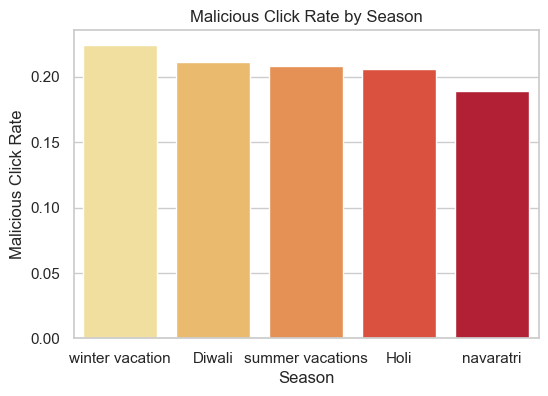


--- Malicious Rate by Season ---
Season
winter vacation     0.224371
Diwali              0.211538
summer vacations    0.208521
Holi                0.205962
navaratri           0.189243
Name: Click_Leads_To_Malicious_Site, dtype: float64


In [35]:
season_rate = (
    df.groupby("Season")["Click_Leads_To_Malicious_Site"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
sns.barplot(x=season_rate.index, y=season_rate.values, palette="YlOrRd")
plt.title("Malicious Click Rate by Season")
plt.xlabel("Season")
plt.ylabel("Malicious Click Rate")
plt.show()

print("\n--- Malicious Rate by Season ---")
print(season_rate)

C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_17444\3728691282.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Age_Group", y="Click_Leads_To_Malicious_Site", palette="mako")


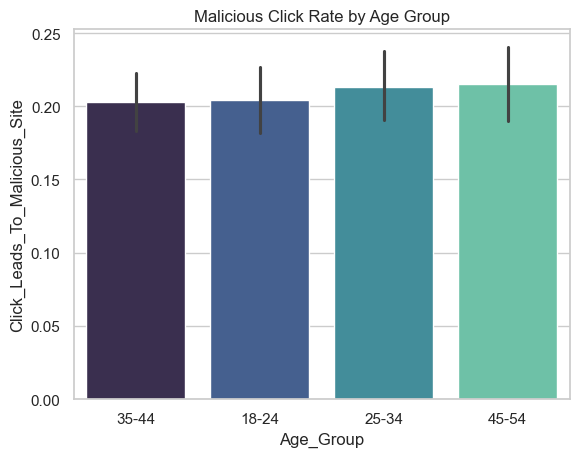

In [37]:
sns.barplot(data=df, x="Age_Group", y="Click_Leads_To_Malicious_Site", palette="mako")
plt.title("Malicious Click Rate by Age Group")
plt.show()



C:\Users\SHUBHAM WAGH\AppData\Local\Temp\ipykernel_17444\1486474334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Device_Type", y="Click_Leads_To_Malicious_Site", palette="crest")


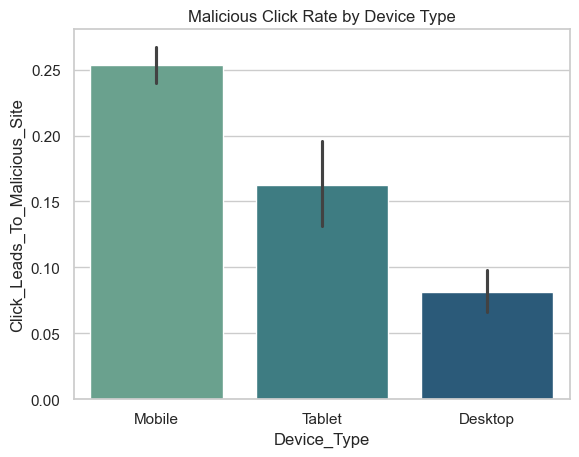

In [38]:

sns.barplot(data=df, x="Device_Type", y="Click_Leads_To_Malicious_Site", palette="crest")
plt.title("Malicious Click Rate by Device Type")
plt.show()